
#**Importing important packages**


In [20]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **Loading Training Dataset**

In [2]:
d_train = pd.read_csv('train.csv')
d_train.info()
print('\n-------------------------------------------------------------------------------------------------------\n')
d_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB

-------------------------------------------------------------------------------------------------------



,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


As per the information about the following dataset, there is one null entry under ' text ' and ' selected_text ' coloumn, we have to remove that entire row.

In [3]:
#checking for null values in dataset
null_row = pd.isnull(d_train['text'])
d_train[null_row]

,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


The row with index no. 314 have null entries.

In [4]:
#removing the values with null entries
d_train.drop([d_train.index[314]] , inplace=True)

#again getting info of dataset
d_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


**Hence now we can see that our data has no null entries.**

In [5]:
#storing important columns as tweets and sentiments
train_tweets = d_train['text']
train_sentiments = d_train['sentiment']

#check for imbalance or balance dataset
train_sentiments.value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

**Our dataset is also fairly balanced so we dont have to do upsampling or downsampling.**

# **Text Preprocessing(TRAINING DATA)**
It is the most important process for text classification problems as it decreases the the size of our dataset corpus be removing such words that do not add much value to our system and it also simplifies our data.
---
**We'll be doing that in following order**:


1.   Every word of our data will be converted to lower case.
2.   Removing all usernames, for eg. @abc.
3.   Removing all the websites and URL's.
4.   Replacing all the positive emojis by the word 'positive' and negative emoji with word 'negative'.
5.   Removing all the alphnumeric words.
6.   Replace all the alphabets of words that occur more than twice to two       times. For eg. 'reallly' to 'really'  
7.   Removing stopwords.
8.   Removing words of length of smaller than 2. 
9.   Lemmatization
10.   Removing all the punctuation marks.


In [6]:
semi_final_train_tweets = []
#converting all the words of tweet into lower case 
for tweet in train_tweets.values :    
    tweet = tweet.lower()

#removing all websites and URL's
    tweet = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" , '' , tweet) 

#removing usernames
    tweet = re.sub('@[^\s]+', '' , tweet)

#replacing emojis
    tweet = re.sub(r'(<3|:\*)', ' positive ', tweet)
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positive ', tweet)
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positive ', tweet)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positive ', tweet)
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' negative ', tweet) 
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negative ', tweet)

#removing all the alphanumeric words
    tweet = re.sub("[^a-zA-Z]", " ", tweet)

#replacing consecutive letters
    tweet = re.sub(r"(.)\1\1+", r"\1\1", tweet)

    semi_final_train_tweets.append(tweet)
            

**Now comes the part of removing stopwords.The list of stopwords that NLTK provides has some words which should not be considered as stopwords because removing them sometimes changes the complete meaning of sentence. For eg. 'not' , 'against' etc etc. So we'll process after removing such words from NLTK stopwords list.**
---



In [7]:
stop_w=list(stopwords.words('english'))
stop_w.remove('not')
stop_w.remove('against')
stop_w.remove('doing')
stop_w.remove('couldn')
stop_w.remove('didn')
stop_w.remove('doesn')
stop_w.remove('hadn')
stop_w.remove('hasn')
stop_w.remove('haven')
stop_w.remove('isn')
stop_w.remove('mightn')
stop_w.remove('mustn')
stop_w.remove('needn')
stop_w.remove('wasn')
stop_w.remove('weren')
stop_w.remove('won')
stop_w.remove('wouldn')

#defining lemmatizer
lematizer = WordNetLemmatizer()

In [8]:
final_train_tweets = []

for tweet in semi_final_train_tweets:
    sentence = []   
    tweet = tweet.split()
    for each_word in tweet:
        if len(each_word) >= 2:
            if each_word not in stop_w:
                each_word = lematizer.lemmatize(each_word)
                sentence.append(each_word)
        else:
            continue
             
    string = ' '.join(sentence)   
    final_train_tweets.append(string) 

In [9]:
final_train_tweets[5]

'shameless plugging best ranger forum earth'

Text preprocessing of been training data has finally been done. We had to follow the same process for test data also.

# **Loading Test Dataset**

In [10]:
d_test = pd.read_csv('test.csv')
d_test.info()
print('\n-------------------------------------------------------------------------------------------------------\n')
d_test.head()
test_tweets = d_test['text']
test_sentiments = d_test['sentiment']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     3534 non-null   object
 1   text       3534 non-null   object
 2   sentiment  3534 non-null   object
dtypes: object(3)
memory usage: 83.0+ KB

-------------------------------------------------------------------------------------------------------



Test data has no null values.

# **Test Preprocessing(TEST DATA)**

In [11]:
final_test_tweets = []
 
for tweet in test_tweets.values :    
    tweet = tweet.lower()
    tweet = re.sub(r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" , '' , tweet) 
    tweet = re.sub('@[^\s]+', '' , tweet)
    tweet = re.sub(r'(<3|:\*)', ' smile ', tweet)
    tweet = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' win ', tweet)
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' happy ', tweet)
    tweet = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' smile ', tweet)
    tweet = re.sub(r'(:,\(|:\'\(|:"\()', ' vampire ', tweet) 
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' sad ', tweet)
    tweet = re.sub("[^a-zA-Z]", " ", tweet)
    tweet = re.sub(r"(.)\1\1+", r"\1\1", tweet)
    sentence = []   
    tweet = tweet.split()
    for each_word in tweet:
        if len(each_word) >= 2:
            if each_word not in stop_w:
                each_word = lematizer.lemmatize(each_word)
                sentence.append(each_word)
        else:
            continue
             
    string = ' '.join(sentence)   
    final_test_tweets.append(string) 

final_test_tweets[2]    

'recession hit veronique branquinho quit company shame'

# **TF-IDF Vectorisation of Training and Test Data**

In [12]:
#converting train tweets to vectors
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
x_train = tf_idf_vect.fit(final_train_tweets)
x_train = tf_idf_vect.transform(final_train_tweets)


#converting test tweets to vectors
x_test = tf_idf_vect.transform(final_test_tweets)

# **Classification using Multinomial Naive Bayes**

In [13]:
classifier = MultinomialNB()
classifier = classifier.fit(x_train , train_sentiments)
pred_sentiments = classifier.predict(x_test)
accuracy = accuracy_score(pred_sentiments , test_sentiments)
print('Accuracy of MultinomialNB is ',accuracy)
print('\n')
print(classification_report(test_sentiments,pred_sentiments))

Accuracy of MultinomialNB is  0.6324278438030561


              precision    recall  f1-score   support

    negative       0.85      0.37      0.52      1001
     neutral       0.53      0.88      0.66      1430
    positive       0.82      0.55      0.66      1103

    accuracy                           0.63      3534
   macro avg       0.73      0.60      0.61      3534
weighted avg       0.71      0.63      0.62      3534



Confusion Matrix of MultinomialNB is given below:


Text(0.5, 1.0, 'Confusion Matrix')

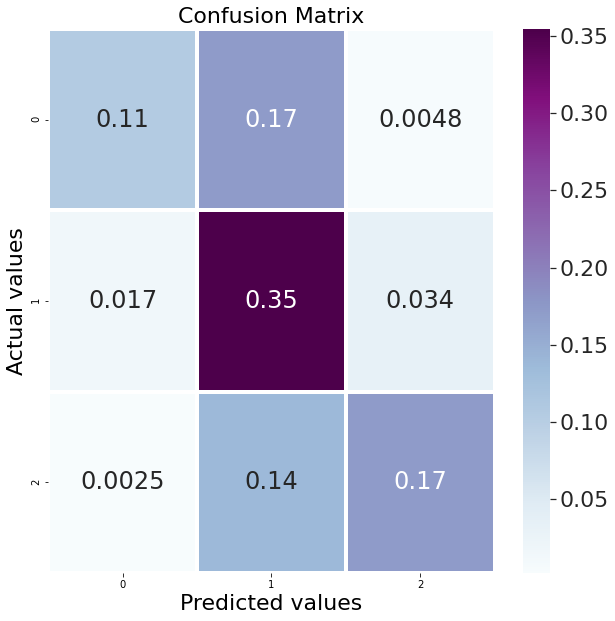

In [14]:
#plotting confusion_matrix of MultinomialNB
print('Confusion Matrix of MultinomialNB is given below:')
cf_matrix = confusion_matrix(test_sentiments,pred_sentiments)
#sns.heatmap(cf_matrix/np.sum(cf_matrix) , figsize=(8,8) , annot=True , fmt='0.2%')
plt.subplots(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True , cmap='BuPu',linecolor='white' , linewidths=3)
plt.xlabel("Predicted values", fontdict = {'size':22})
plt.ylabel("Actual values"   , fontdict = {'size':22})
plt.title ("Confusion Matrix", fontdict = {'size':22})

# **Classification using Logistic Regression**

In [40]:
#we will use GridSearch to find for perfect hyperparameter
tuned_parameters = [{'C': [ 10**-4,10**-2,10**0,10**2,10**4 ]}]
x = LogisticRegression(penalty='l1', solver="liblinear")
classifier = GridSearchCV(x , tuned_parameters , cv =5)
#, scoring = ['accuracy' , 'f1'],refit=f1_score
classifier.fit(x_train , train_sentiments)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
pred_sentiments = classifier.predict(x_test)
accuracy = accuracy_score(pred_sentiments , test_sentiments)
print(accuracy) 
#
print('\n')
print(classification_report(test_sentiments,pred_sentiments))

0.7283531409168081


              precision    recall  f1-score   support

    negative       0.75      0.68      0.71      1001
     neutral       0.68      0.73      0.70      1430
    positive       0.79      0.78      0.78      1103

    accuracy                           0.73      3534
   macro avg       0.74      0.73      0.73      3534
weighted avg       0.73      0.73      0.73      3534



Confusion Matrix of Logistic Regression is given below:


Text(0.5, 1.0, 'Confusion Matrix')

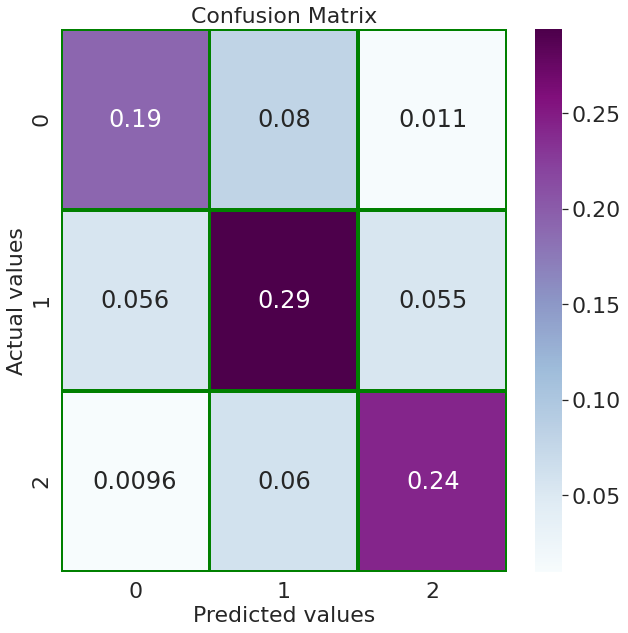

In [42]:
#plotting confusion_matrix of Logistic_Regression
print('Confusion Matrix of Logistic Regression is given below:')
cf_matrix = confusion_matrix(test_sentiments,pred_sentiments)
plt.subplots(figsize=(10,10))
sns.set(font_scale=2)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True , cmap='BuPu',linecolor='green' , linewidths=3)
plt.xlabel("Predicted values", fontdict = {'size':22})
plt.ylabel("Actual values"   , fontdict = {'size':22})
plt.title ("Confusion Matrix", fontdict = {'size':22})

# **Accuracy from MultinomialNB model = 63.15%**
# **Accuracy from Logistic Regression model = 72.85%** 
# **Hence we can conclude that Logistic Regression is better model**